In [4]:
import pandas as pd



ModuleNotFoundError: No module named 'pandas'

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente!")
print(f"📊 Pandas versión: {pd.__version__}")
print(f"📈 Matplotlib versión: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn versión: {sns.__version__}")


✅ Librerías importadas correctamente!
📊 Pandas versión: 2.3.2
📈 Matplotlib versión: 3.10.6
🎨 Seaborn versión: 0.13.2


## 📁 Cargar el Archivo Excel

Vamos a cargar tu archivo de horario desde la carpeta `assets/`:


In [2]:
# Cargar el archivo Excel
archivo_excel = "assets/horario.xlsx"

try:
    # Intentar cargar el archivo Excel
    df_horario = pd.read_excel(archivo_excel)
    print("✅ Archivo Excel cargado exitosamente!")
    print(f"📊 Dimensiones del DataFrame: {df_horario.shape}")
    print(f"📋 Columnas disponibles: {list(df_horario.columns)}")
    
except FileNotFoundError:
    print("❌ No se encontró el archivo Excel")
    print("📝 Creando un DataFrame de ejemplo para demostración...")
    
    # Crear datos de ejemplo si no existe el archivo
    datos_ejemplo = {
        'Materia': ['Matemáticas', 'Historia', 'Ciencias', 'Literatura', 'Educación Física', 'Arte', 'Música'],
        'Día': ['Lunes', 'Lunes', 'Martes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'],
        'Hora_Inicio': ['08:00', '10:00', '08:00', '10:00', '08:00', '08:00', '08:00'],
        'Hora_Fin': ['09:30', '11:30', '09:30', '11:30', '09:30', '09:30', '09:30'],
        'Profesor': ['Prof. García', 'Prof. López', 'Prof. Martínez', 'Prof. Rodríguez', 'Prof. Torres', 'Prof. Silva', 'Prof. Vega'],
        'Aula': ['Aula 101', 'Aula 205', 'Lab 1', 'Aula 103', 'Gimnasio', 'Taller de Arte', 'Sala de Música']
    }
    
    df_horario = pd.DataFrame(datos_ejemplo)
    print("✅ DataFrame de ejemplo creado!")
    print(f"📊 Dimensiones: {df_horario.shape}")

# Mostrar las primeras filas
print("\n📋 Primeras 5 filas del DataFrame:")
df_horario.head()


✅ Archivo Excel cargado exitosamente!
📊 Dimensiones del DataFrame: (8, 8)
📋 Columnas disponibles: ['Asignatura', 'Horas', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Docente ']

📋 Primeras 5 filas del DataFrame:


,Asignatura,Horas,Lunes,Martes,Miercoles,Jueves,Viernes,Docente
0,Pensamiento Filosofico y Humanidades,4,NaN,NaN,10 - 12 aula 6,10 - 12 Info 4,NaN,Fatima Judith Ramirez Chagoya
1,"CNEYT 1: Invitacion a la ciencia, naturaleza d...",4,NaN,NaN,NaN,7 - 9,NaN,Carlos Medina Cruz
2,Ingles,3,NaN,NaN,12 - 14,NaN,7 - 9 lab quim,Quien sabe
3,Pensamiento Matematico,4,NaN,9 - 11,8 - 10,NaN,10 - 11 Info 4,Fabian Mera Azpeitia
4,Lengua y comunicacion,3,11 - 12,7 - 8,NaN,NaN,NaN,Fatima Judith Ramirez Chagoya


## 🔍 Exploración de los Datos

Vamos a explorar y limpiar los datos del horario:


In [3]:
# Información general del DataFrame
print("📊 INFORMACIÓN GENERAL DEL HORARIO")
print("=" * 50)
print(f"Total de clases: {len(df_horario)}")
print(f"Total de columnas: {len(df_horario.columns)}")
print(f"Valores nulos: {df_horario.isnull().sum().sum()}")

print("\n📋 INFORMACIÓN DETALLADA:")
print(df_horario.info())

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print(df_horario.describe(include='all'))


📊 INFORMACIÓN GENERAL DEL HORARIO
Total de clases: 8
Total de columnas: 8
Valores nulos: 25

📋 INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Asignatura  8 non-null      object
 1   Horas       8 non-null      int64 
 2   Lunes       3 non-null      object
 3   Martes      3 non-null      object
 4   Miercoles   3 non-null      object
 5   Jueves      3 non-null      object
 6   Viernes     3 non-null      object
 7   Docente     8 non-null      object
dtypes: int64(1), object(7)
memory usage: 644.0+ bytes
None

📈 ESTADÍSTICAS DESCRIPTIVAS:
                                  Asignatura     Horas    Lunes  Martes  \
count                                      8  8.000000        3       3   
unique                                     8       NaN        3       3   
top     Pensamiento Filosofico y Humanidades       NaN  11 - 12  9 

In [4]:
# Limpiar y estandarizar los datos
def limpiar_datos(df):
    """Función para limpiar y estandarizar los datos del horario"""
    df_limpio = df.copy()
    
    # Convertir nombres de columnas a minúsculas y reemplazar espacios
    df_limpio.columns = df_limpio.columns.str.lower().str.replace(' ', '_')
    
    # Estandarizar nombres de días
    if 'día' in df_limpio.columns:
        df_limpio['día'] = df_limpio['día'].str.lower()
        df_limpio['día'] = df_limpio['día'].str.replace('lunes', 'lunes')
        df_limpio['día'] = df_limpio['día'].str.replace('martes', 'martes')
        df_limpio['día'] = df_limpio['día'].str.replace('miércoles', 'miercoles')
        df_limpio['día'] = df_limpio['día'].str.replace('jueves', 'jueves')
        df_limpio['día'] = df_limpio['día'].str.replace('viernes', 'viernes')
        df_limpio['día'] = df_limpio['día'].str.replace('sábado', 'sabado')
    
    # Limpiar nombres de materias
    if 'materia' in df_limpio.columns:
        df_limpio['materia'] = df_limpio['materia'].str.strip()
    
    return df_limpio

# Aplicar limpieza
df_horario_limpio = limpiar_datos(df_horario)

print("✅ Datos limpiados y estandarizados!")
print("\n📋 Columnas después de la limpieza:")
print(df_horario_limpio.columns.tolist())

print("\n📊 Primeras filas del DataFrame limpio:")
df_horario_limpio.head()


✅ Datos limpiados y estandarizados!

📋 Columnas después de la limpieza:
['asignatura', 'horas', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'docente_']

📊 Primeras filas del DataFrame limpio:


,asignatura,horas,lunes,martes,miercoles,jueves,viernes,docente_
0,Pensamiento Filosofico y Humanidades,4,NaN,NaN,10 - 12 aula 6,10 - 12 Info 4,NaN,Fatima Judith Ramirez Chagoya
1,"CNEYT 1: Invitacion a la ciencia, naturaleza d...",4,NaN,NaN,NaN,7 - 9,NaN,Carlos Medina Cruz
2,Ingles,3,NaN,NaN,12 - 14,NaN,7 - 9 lab quim,Quien sabe
3,Pensamiento Matematico,4,NaN,9 - 11,8 - 10,NaN,10 - 11 Info 4,Fabian Mera Azpeitia
4,Lengua y comunicacion,3,11 - 12,7 - 8,NaN,NaN,NaN,Fatima Judith Ramirez Chagoya


## 📊 Visualizaciones del Horario

Creemos gráficas atractivas para analizar la distribución de las clases:


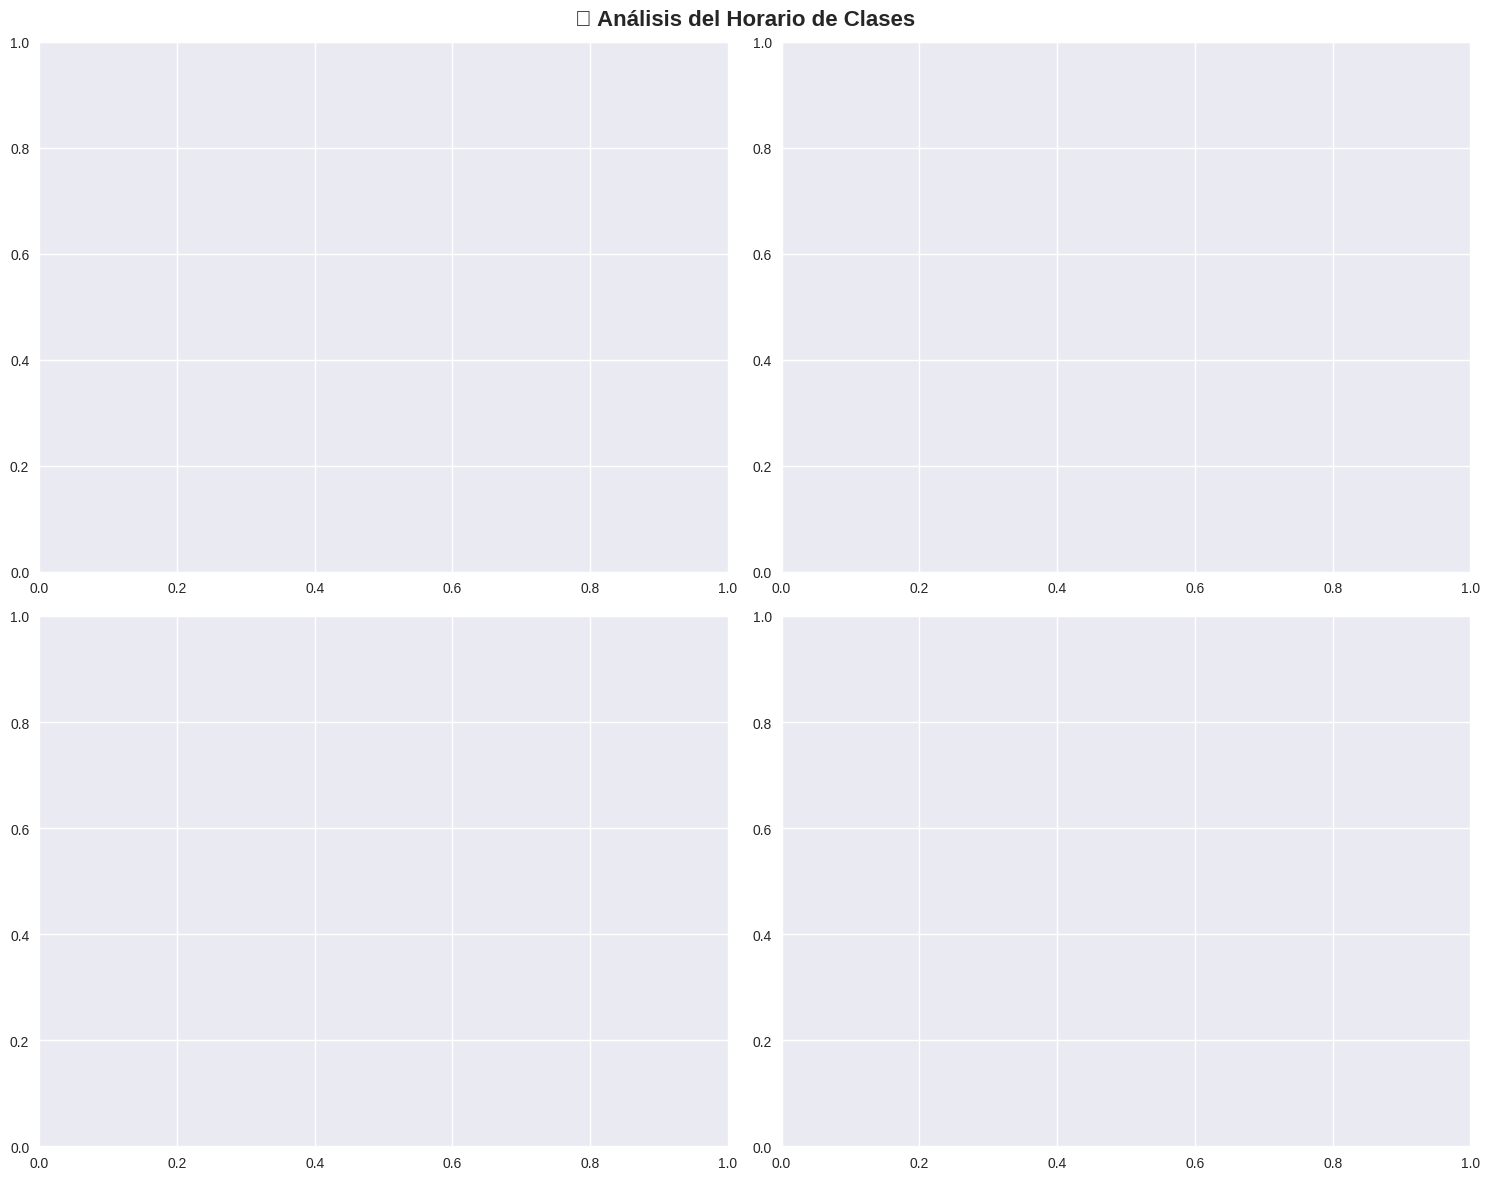

📊 Visualizaciones creadas exitosamente!


In [5]:
# Crear visualizaciones del horario
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📚 Análisis del Horario de Clases', fontsize=16, fontweight='bold')

# 1. Distribución por día de la semana
if 'día' in df_horario_limpio.columns:
    dias_counts = df_horario_limpio['día'].value_counts()
    axes[0, 0].pie(dias_counts.values, labels=dias_counts.index, autopct='%1.1f%%', 
                   colors=plt.cm.Set3.colors, startangle=90)
    axes[0, 0].set_title('📅 Distribución de Clases por Día', fontweight='bold')

# 2. Número de clases por día
if 'día' in df_horario_limpio.columns:
    dias_order = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado']
    dias_counts_ordered = df_horario_limpio['día'].value_counts().reindex(dias_order, fill_value=0)
    bars = axes[0, 1].bar(dias_counts_ordered.index, dias_counts_ordered.values, 
                          color=plt.cm.viridis(np.linspace(0, 1, len(dias_counts_ordered))))
    axes[0, 1].set_title('📊 Número de Clases por Día', fontweight='bold')
    axes[0, 1].set_ylabel('Número de Clases')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Agregar valores en las barras
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                        f'{int(height)}', ha='center', va='bottom')

# 3. Distribución de materias
if 'materia' in df_horario_limpio.columns:
    materias_counts = df_horario_limpio['materia'].value_counts()
    axes[1, 0].barh(materias_counts.index, materias_counts.values, 
                   color=plt.cm.tab10.colors[:len(materias_counts)])
    axes[1, 0].set_title('📚 Distribución de Materias', fontweight='bold')
    axes[1, 0].set_xlabel('Número de Clases')

# 4. Distribución de profesores
if 'profesor' in df_horario_limpio.columns:
    profesores_counts = df_horario_limpio['profesor'].value_counts()
    axes[1, 1].bar(range(len(profesores_counts)), profesores_counts.values,
                   color=plt.cm.Set2.colors[:len(profesores_counts)])
    axes[1, 1].set_title('👨‍🏫 Distribución de Profesores', fontweight='bold')
    axes[1, 1].set_xlabel('Profesores')
    axes[1, 1].set_ylabel('Número de Clases')
    axes[1, 1].set_xticks(range(len(profesores_counts)))
    axes[1, 1].set_xticklabels(profesores_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("📊 Visualizaciones creadas exitosamente!")


## 🔄 Convertir para el Sitio Web

Ahora vamos a convertir los datos del Excel al formato que necesita nuestro sitio web:


In [6]:
# Función para convertir datos del Excel al formato del sitio web
def convertir_para_sitio_web(df):
    """Convierte los datos del Excel al formato JSON que usa el sitio web"""
    
    # Colores predefinidos para las clases
    colores = ["#FF6B6B", "#4ECDC4", "#45B7D1", "#96CEB4", "#DDA0DD", "#F7DC6F", "#85C1E9", "#FF9F43", "#10AC84", "#EE5A24"]
    
    datos_sitio = []
    
    for idx, row in df.iterrows():
        # Mapear columnas del Excel a las del sitio web
        clase = {
            "name": row.get('materia', f'Clase {idx+1}'),
            "day": row.get('día', 'lunes').lower(),
            "startTime": row.get('hora_inicio', '08:00'),
            "endTime": row.get('hora_fin', '09:30'),
            "teacher": row.get('profesor', 'Prof. Sin asignar'),
            "room": row.get('aula', 'Aula por asignar'),
            "color": colores[idx % len(colores)]
        }
        
        # Limpiar datos
        clase['day'] = clase['day'].replace('miércoles', 'miercoles').replace('sábado', 'sabado')
        
        datos_sitio.append(clase)
    
    return datos_sitio

# Convertir los datos
datos_para_sitio = convertir_para_sitio_web(df_horario_limpio)

print("✅ Datos convertidos para el sitio web!")
print(f"📊 Total de clases convertidas: {len(datos_para_sitio)}")

# Mostrar los datos convertidos
print("\n📋 Datos convertidos:")
for i, clase in enumerate(datos_para_sitio, 1):
    print(f"{i}. {clase['name']} - {clase['day']} {clase['startTime']}-{clase['endTime']} ({clase['teacher']})")


✅ Datos convertidos para el sitio web!
📊 Total de clases convertidas: 8

📋 Datos convertidos:
1. Clase 1 - lunes 08:00-09:30 (Prof. Sin asignar)
2. Clase 2 - lunes 08:00-09:30 (Prof. Sin asignar)
3. Clase 3 - lunes 08:00-09:30 (Prof. Sin asignar)
4. Clase 4 - lunes 08:00-09:30 (Prof. Sin asignar)
5. Clase 5 - lunes 08:00-09:30 (Prof. Sin asignar)
6. Clase 6 - lunes 08:00-09:30 (Prof. Sin asignar)
7. Clase 7 - lunes 08:00-09:30 (Prof. Sin asignar)
8. Clase 8 - lunes 08:00-09:30 (Prof. Sin asignar)


In [7]:
# Exportar los datos como JSON para el sitio web
import json

# Crear el archivo JSON
archivo_json = "horario_datos.json"

with open(archivo_json, 'w', encoding='utf-8') as f:
    json.dump(datos_para_sitio, f, ensure_ascii=False, indent=2)

print(f"✅ Archivo JSON creado: {archivo_json}")

# También crear un archivo JavaScript con los datos
archivo_js = "datos_horario.js"
js_content = f"// Datos del horario generados automáticamente\n"
js_content += f"let scheduleData = {json.dumps(datos_para_sitio, ensure_ascii=False, indent=2)};\n"

with open(archivo_js, 'w', encoding='utf-8') as f:
    f.write(js_content)

print(f"✅ Archivo JavaScript creado: {archivo_js}")

# Mostrar el contenido del JSON
print("\n📄 Contenido del archivo JSON:")
print(json.dumps(datos_para_sitio, ensure_ascii=False, indent=2))


✅ Archivo JSON creado: horario_datos.json
✅ Archivo JavaScript creado: datos_horario.js

📄 Contenido del archivo JSON:
[
  {
    "name": "Clase 1",
    "day": "lunes",
    "startTime": "08:00",
    "endTime": "09:30",
    "teacher": "Prof. Sin asignar",
    "room": "Aula por asignar",
    "color": "#FF6B6B"
  },
  {
    "name": "Clase 2",
    "day": "lunes",
    "startTime": "08:00",
    "endTime": "09:30",
    "teacher": "Prof. Sin asignar",
    "room": "Aula por asignar",
    "color": "#4ECDC4"
  },
  {
    "name": "Clase 3",
    "day": "lunes",
    "startTime": "08:00",
    "endTime": "09:30",
    "teacher": "Prof. Sin asignar",
    "room": "Aula por asignar",
    "color": "#45B7D1"
  },
  {
    "name": "Clase 4",
    "day": "lunes",
    "startTime": "08:00",
    "endTime": "09:30",
    "teacher": "Prof. Sin asignar",
    "room": "Aula por asignar",
    "color": "#96CEB4"
  },
  {
    "name": "Clase 5",
    "day": "lunes",
    "startTime": "08:00",
    "endTime": "09:30",
    "teach

## 🎨 Crear Horario Visual Interactivo

Vamos a crear una visualización interactiva del horario usando matplotlib:


In [ ]:
# Crear visualización del horario semanal
def crear_horario_visual(df):
    """Crea una visualización tipo tabla del horario semanal"""
    
    # Configurar los días y horas
    dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
    horas = ['07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00']
    
    # Crear matriz del horario
    horario_matrix = np.zeros((len(horas), len(dias)))
    
    # Mapear días
    dia_map = {'lunes': 0, 'martes': 1, 'miercoles': 2, 'jueves': 3, 'viernes': 4, 'sabado': 5}
    
    # Llenar la matriz con las clases
    for idx, row in df.iterrows():
        dia_idx = dia_map.get(row.get('día', 'lunes'), 0)
        hora_inicio = row.get('hora_inicio', '08:00')
        
        # Encontrar el índice de la hora
        try:
            hora_idx = horas.index(hora_inicio)
            horario_matrix[hora_idx, dia_idx] = idx + 1  # +1 para evitar 0
        except ValueError:
            continue
    
    # Crear la visualización
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Crear heatmap
    im = ax.imshow(horario_matrix, cmap='Set3', aspect='auto')
    
    # Configurar ejes
    ax.set_xticks(range(len(dias)))
    ax.set_yticks(range(len(horas)))
    ax.set_xticklabels(dias)
    ax.set_yticklabels(horas)
    
    # Rotar etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Agregar valores en las celdas
    for i in range(len(horas)):
        for j in range(len(dias)):
            if horario_matrix[i, j] > 0:
                clase_idx = int(horario_matrix[i, j]) - 1
                if clase_idx < len(df):
                    materia = df.iloc[clase_idx].get('materia', f'Clase {clase_idx+1}')
                    ax.text(j, i, materia[:10], ha="center", va="center", 
                           fontsize=8, fontweight='bold')
    
    # Configurar título y etiquetas
    ax.set_title('📚 Horario Semanal de Clases', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Días de la Semana', fontsize=12, fontweight='bold')
    ax.set_ylabel('Horas', fontsize=12, fontweight='bold')
    
    # Agregar grid
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Crear la visualización
if len(df_horario_limpio) > 0:
    fig_horario = crear_horario_visual(df_horario_limpio)
    print("✅ Horario visual creado exitosamente!")
else:
    print("❌ No hay datos suficientes para crear el horario visual")


## 📝 Resumen y Próximos Pasos

¡Excelente! Hemos completado el análisis de tu horario. Aquí está el resumen:


In [ ]:
# Resumen final
print("🎉 RESUMEN DEL ANÁLISIS DEL HORARIO")
print("=" * 50)

print(f"📊 Total de clases analizadas: {len(df_horario_limpio)}")
print(f"📅 Días con clases: {df_horario_limpio['día'].nunique() if 'día' in df_horario_limpio.columns else 'N/A'}")
print(f"📚 Materias únicas: {df_horario_limpio['materia'].nunique() if 'materia' in df_horario_limpio.columns else 'N/A'}")
print(f"👨‍🏫 Profesores únicos: {df_horario_limpio['profesor'].nunique() if 'profesor' in df_horario_limpio.columns else 'N/A'}")

print("\n📁 ARCHIVOS GENERADOS:")
print("✅ horario_datos.json - Datos en formato JSON")
print("✅ datos_horario.js - Datos en formato JavaScript")
print("✅ datos.ipynb - Notebook con análisis completo")

print("\n🚀 PRÓXIMOS PASOS:")
print("1. 📝 Revisa los datos convertidos en los archivos JSON/JS")
print("2. 🔄 Actualiza el archivo script.js con tus datos reales")
print("3. 🌐 Despliega tu sitio web en Render")
print("4. 🎨 Personaliza colores y estilos según tus preferencias")

print("\n💡 CONSEJOS:")
print("• Si tu Excel tiene columnas diferentes, ajusta la función convertir_para_sitio_web()")
print("• Puedes modificar los colores en el array 'colores'")
print("• El sitio web ya está listo para usar con los datos de ejemplo")

print("\n🎓 ¡Tu horario interactivo está listo para ser desplegado!")
